Download https://github.com/RyanrDavies/curvytron-client somewhere

In [1]:
%cd ../../curvytron-client

/Users/kungfujam/git/forks/curvytron-client


In [2]:
import threading
import env
import matplotlib.pyplot as plt
from IPython import display
import numpy as np

Start a curvytron server and point to its address (can use curvytron.com)

In [3]:
serveraddress = "129.215.91.49:8080"

Random policy

In [4]:
environment = env.CurvytronEnv(server=serveraddress, room='room2', name='bill')

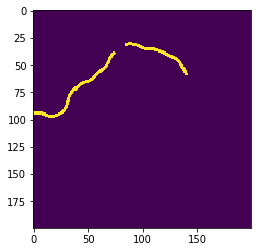

done


Exception in thread bill:
Traceback (most recent call last):
  File "/Users/kungfujam/anaconda2/envs/rlhack/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/Users/kungfujam/git/forks/curvytron-client/client.py", line 84, in run
    self._process_recvd(recvd)
  File "/Users/kungfujam/git/forks/curvytron-client/client.py", line 166, in _process_recvd
    messages = json.loads(recvd)
  File "/Users/kungfujam/anaconda2/envs/rlhack/lib/python3.6/json/__init__.py", line 354, in loads
    return _default_decoder.decode(s)
  File "/Users/kungfujam/anaconda2/envs/rlhack/lib/python3.6/json/decoder.py", line 339, in decode
    obj, end = self.raw_decode(s, idx=_w(s, 0).end())
  File "/Users/kungfujam/anaconda2/envs/rlhack/lib/python3.6/json/decoder.py", line 357, in raw_decode
    raise JSONDecodeError("Expecting value", s, err.value) from None
json.decoder.JSONDecodeError: Expecting value: line 1 column 1 (char 0)



In [5]:
environment.reset()
episode_over = False
while not episode_over:
    action = np.random.choice(3)
    ob,r,episode_over = environment.step(action)
    display.display(plt.imshow(ob))
    display.clear_output(wait=True)
    plt.pause(0.005)
print("done")
environment.client.join()  # kills the player

kill the player

In [6]:
environment.client.join()

In [7]:
def random(environment):
    environment.reset()
    episode_over = False
    while not episode_over:
        action = np.random.choice(3)
        ob, r, episode_over = environment.step(action)
        plt.pause(0.005)

In [8]:
environments = [env.CurvytronEnv(server=serveraddress, room='multiplayer', name='bob{}'.format(ii)) 
                for ii in range(5)]

Go join the game yourself!

In [9]:
threads = []
for ee in environments:
    t = threading.Thread(target=random, args=(ee,))
    threads.append(t)
    t.start()

In [10]:
for ee in environments:
    ee.client.join()  # kills the player

close status: 23387
close status: 23387
close status: 23387
close status: 23387
close status: 23387
